In [449]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-white")


C:\Users\Kevin\AppData\Local\Temp\ipykernel_5924\1806114291.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


#### 0 a)

<AxesSubplot: xlabel='Minutes', ylabel='SEK'>

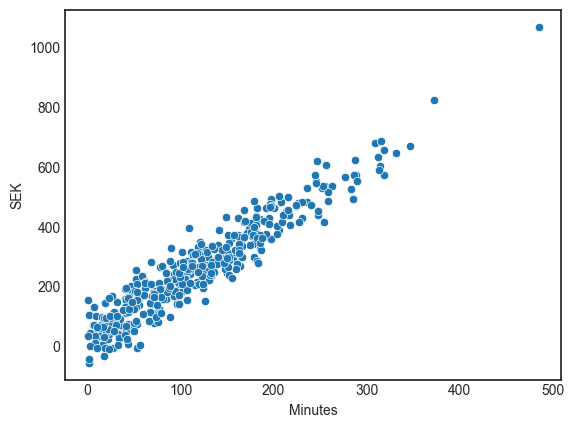

In [450]:
np.random.seed(42)

df = pd.DataFrame()

df['Minutes'] = np.random.normal(100, 100, size=400)
df['Minutes'] = df['Minutes'].abs()

noise = np.random.normal(0, 50, size=400)

df['SEK'] = 2 * df['Minutes'] + 25 + noise

sns.scatterplot(data=df, x=df["Minutes"], y=df['SEK'])

#### 0 b)

<AxesSubplot: xlabel='Minutes', ylabel='SEK'>

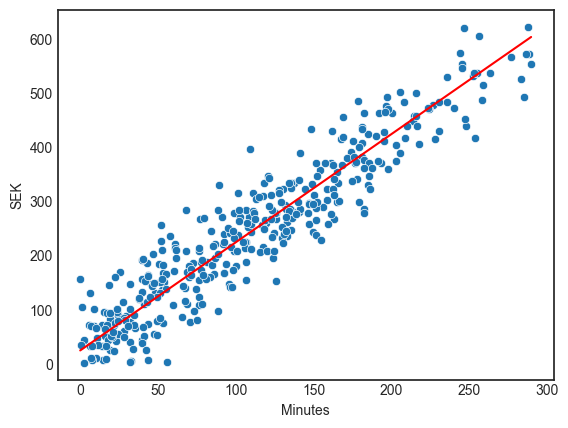

In [451]:
df = df.drop(df[df['Minutes'] > 300].index)
df = df.drop(df[df['SEK'] < 0].index)

sns.scatterplot(data=df, x=df["Minutes"], y=df['SEK'])


x, y = df['Minutes'], df['SEK']
b0 = 25
b1 = 2

y_hat = lambda x: b0 + b1*x

sns.lineplot(data=df, x=df["Minutes"], y=y_hat(x), color='red')


#### 0 c)

In [452]:
df.head()

,Minutes,SEK
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


#### 1 a)

In [453]:
def train_test_split(df: pd.DataFrame, train_fraction: float, seed: int, replace: bool) -> tuple:
    numeric_fraction = int(len(df) * train_fraction) # using int() to round. is using round better or worse?
    
    train = df.sample(n=numeric_fraction, replace=replace, random_state=seed)
    test = df.drop(train.index)
    
    return (train['Minutes'], test['Minutes'], train['SEK'], test['SEK'])

In [454]:
# (X_train, X_test, y_train, y_test)

train_test = train_test_split(df, train_fraction=0.7, seed=42, replace=False)

x_train = np.array(train_test[0]).reshape(-1, 1)
x_test = np.array(train_test[1]).reshape(-1, 1)

y_train = np.array(train_test[2]).reshape(-1, 1)
y_test = np.array(train_test[3]).reshape(-1, 1)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((266, 1), (115, 1), (266, 1), (115, 1))

#### 2

In [460]:
# Add slope
#x_train = np.c_[np.ones(len(x_train)), x_train]

regression_fit = lambda X, y: np.linalg.pinv(X.T @ X) @ X.T @ y

b0, b1 = regression_fit(x_train, y_train)

(array([32.22147722]), array([1.91050591]))

In [ ]:
x_test = train_test[1]
y_test = train_test[3]

y_hat = lambda x: b0 + b1 * x

sns.scatterplot(x=x_train, y=y_train)
sns.lineplot(x=x_test, y=y_hat(x_test), color='red')

# Ground truth
hat = lambda x: 25 + 2*x
sns.lineplot(x=df["Minutes"], y=hat(x), color='green')

ValueError: Per-column arrays must each be 1-dimensional

#### 3 a)

<AxesSubplot: xlabel='Minutes', ylabel='SEK'>

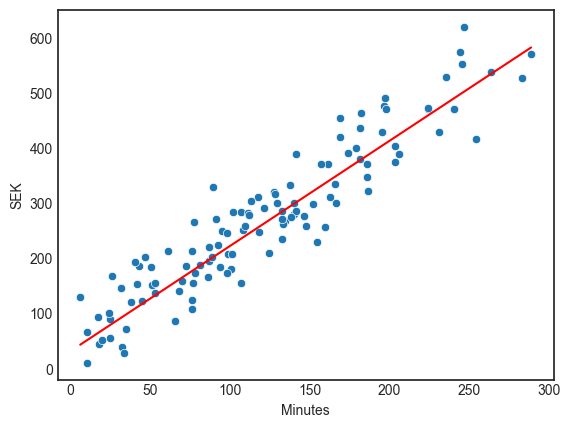

In [ ]:
sns.scatterplot(x=x_test, y=y_test)
sns.lineplot(x=x_test, y=y_hat(x_test), color='red')

#### 3 b) - need to learn first